In [1]:
import pandas as pd
import dateutil
import time

In [2]:
data_january = pd.read_csv("./data/1january.csv.zip", compression='zip', header=0, sep=',')
#data_january = data_january.iloc[0::10,:]
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.0,8.8,2
1,2016-01-01 00:00:00,40.72991,-73.98078,4.90,5,2016-01-01 00:00:00,40.71668,-73.94447,18.0,0.0,1.3,0.0,19.3,1
2,2016-01-01 00:00:00,40.67957,-73.98455,10.54,1,2016-01-01 00:00:00,40.78893,-73.95027,33.0,0.0,1.3,0.0,34.3,1
3,2016-01-01 00:00:00,40.71899,-73.99347,4.75,1,2016-01-01 00:00:00,40.65733,-73.96224,16.5,0.0,0.8,0.0,17.3,2
4,2016-01-01 00:00:00,40.78133,-73.96062,1.76,3,2016-01-01 00:00:00,40.75851,-73.97726,8.0,0.0,0.8,0.0,8.8,2


In [3]:
type(data_january.iloc[0,0])

str

In [4]:
data_january.shape

(10906858, 14)

In [5]:

start = time.time()

In [6]:
data_january['pickup_datetime'] = data_january['pickup_datetime'].apply(dateutil.parser.parse)
data_january['dropoff_datetime'] = data_january['dropoff_datetime'].apply(dateutil.parser.parse)
end = time.time()
duration = end -start
duration

2266.4708337783813

In [7]:
data_january.shape

(10906858, 14)

In [8]:
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01,40.73470,-73.99037,1.10,2,2016-01-01,40.73241,-73.98184,7.5,0.0,1.3,0.0,8.8,2
1,2016-01-01,40.72991,-73.98078,4.90,5,2016-01-01,40.71668,-73.94447,18.0,0.0,1.3,0.0,19.3,1
2,2016-01-01,40.67957,-73.98455,10.54,1,2016-01-01,40.78893,-73.95027,33.0,0.0,1.3,0.0,34.3,1
3,2016-01-01,40.71899,-73.99347,4.75,1,2016-01-01,40.65733,-73.96224,16.5,0.0,0.8,0.0,17.3,2
4,2016-01-01,40.78133,-73.96062,1.76,3,2016-01-01,40.75851,-73.97726,8.0,0.0,0.8,0.0,8.8,2


In [9]:
data_january.reset_index(drop=True, inplace=True)
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01,40.73470,-73.99037,1.10,2,2016-01-01,40.73241,-73.98184,7.5,0.0,1.3,0.0,8.8,2
1,2016-01-01,40.72991,-73.98078,4.90,5,2016-01-01,40.71668,-73.94447,18.0,0.0,1.3,0.0,19.3,1
2,2016-01-01,40.67957,-73.98455,10.54,1,2016-01-01,40.78893,-73.95027,33.0,0.0,1.3,0.0,34.3,1
3,2016-01-01,40.71899,-73.99347,4.75,1,2016-01-01,40.65733,-73.96224,16.5,0.0,0.8,0.0,17.3,2
4,2016-01-01,40.78133,-73.96062,1.76,3,2016-01-01,40.75851,-73.97726,8.0,0.0,0.8,0.0,8.8,2


In [10]:
data_january.iloc[0,0].weekday()

4

In [11]:
#Columna para el dia de la semana
data_january['weekday'] = data_january['pickup_datetime'].apply(lambda x : x.weekday())

In [12]:
#Columna para la hora de pickup
data_january['hour'] = data_january['pickup_datetime'].apply(lambda x : x.hour)

In [13]:
data_january['dummy'] = 1
group_dataframe = data_january.loc[:, ['weekday','hour','dummy']]
groups = group_dataframe.groupby(['weekday','hour'])

In [14]:
pickups_per_hour = groups.sum()

In [15]:
import matplotlib.pyplot as plt

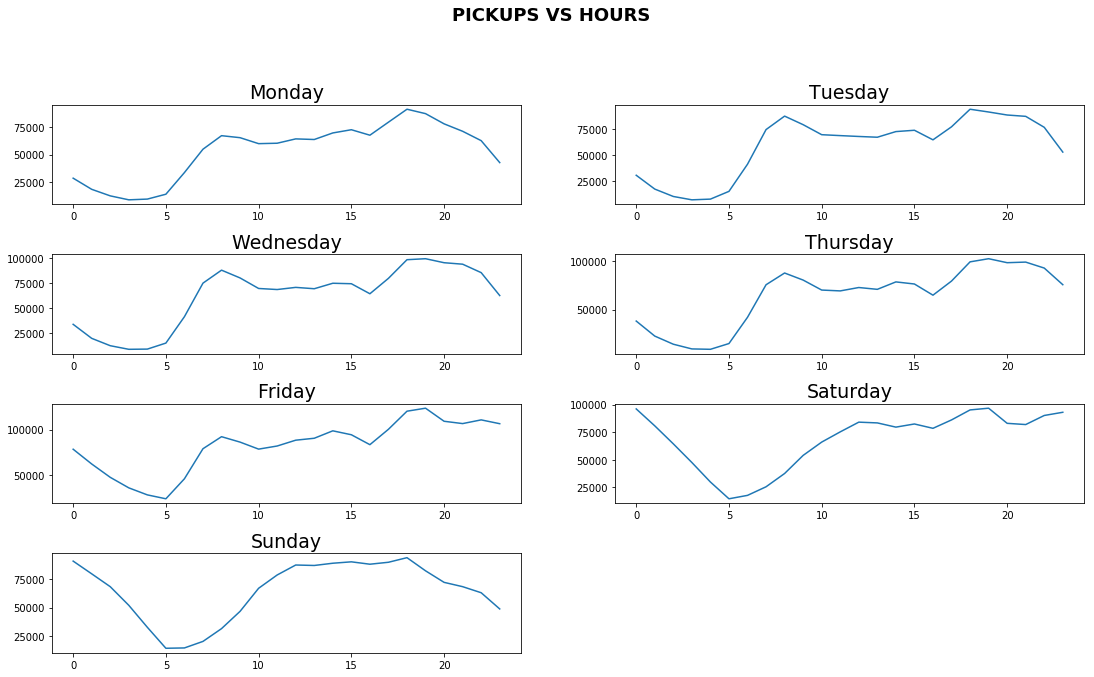

In [18]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('PICKUPS VS HOURS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
# Monday
axis1 = fig.add_subplot(4,2,1)
axis1.set_title('Monday', fontsize=19)
monday = pickups_per_hour.loc[0:0,:].index.get_level_values('hour').tolist()
monday_1 = pickups_per_hour.loc[0:0,:]['dummy'].tolist()
axis1.plot(monday,monday_1)

#Tuesday 
axis2 = fig.add_subplot(4,2,2)
axis2.set_title('Tuesday', fontsize=19)
tuesday = pickups_per_hour.loc[1:1,:].index.get_level_values('hour').tolist()
tuesday_1 = pickups_per_hour.loc[1:1,:]['dummy'].tolist()
axis2.plot(tuesday,tuesday_1)

# Wednesday
axis3 = fig.add_subplot(4,2,3)
axis3.set_title('Wednesday', fontsize=19)
wednesday = pickups_per_hour.loc[2:2,:].index.get_level_values('hour').tolist()
wednesday_1 = pickups_per_hour.loc[2:2,:]['dummy'].tolist()
axis3.plot(wednesday,wednesday_1)

# Thursday
axis4 = fig.add_subplot(4,2,4)
axis4.set_title('Thursday', fontsize=19)
thursday = pickups_per_hour.loc[3:3,:].index.get_level_values('hour').tolist()
thursday_1 = pickups_per_hour.loc[3:3,:]['dummy'].tolist()
axis4.plot(thursday,thursday_1)

# Friday 
axis5 = fig.add_subplot(4,2,5)
axis5.set_title('Friday', fontsize=19)
friday =  pickups_per_hour.loc[4:4,:].index.get_level_values('hour').tolist()
friday_1 = pickups_per_hour.loc[4:4,:]['dummy'].tolist()
axis5.plot(friday,friday_1)

# Saturday
axis6 = fig.add_subplot(4,2,6)
axis6.set_title('Saturday', fontsize=19)
saturday = pickups_per_hour.loc[5:5,:].index.get_level_values('hour').tolist()
saturday_1 = pickups_per_hour.loc[5:5,:]['dummy'].tolist()
axis6.plot(saturday,saturday_1)

# Sunday
axis7 = fig.add_subplot(4,2,7)
axis7.set_title('Sunday', fontsize=19)
sunday = pickups_per_hour.loc[6:6,:].index.get_level_values('hour').tolist()
sunday_1 = pickups_per_hour.loc[6:6,:]['dummy'].tolist()
axis7.plot(sunday,sunday_1)

plt.show()

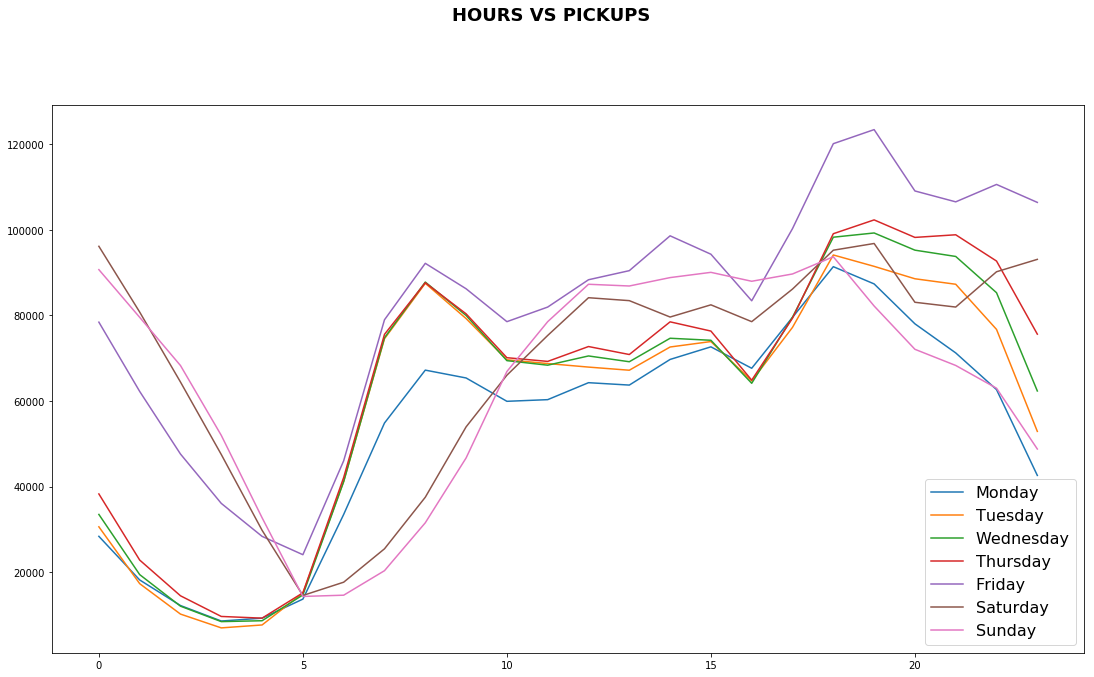

In [19]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS PICKUPS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
axis1 = fig.add_subplot(1,1,1)
axis1.plot(monday,monday_1)
axis1.plot(tuesday,tuesday_1)
axis1.plot(wednesday,wednesday_1)
axis1.plot(thursday,thursday_1)
axis1.plot(friday,friday_1)
axis1.plot(saturday,saturday_1)
axis1.plot(sunday,sunday_1)
axis1.legend(['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=16) # 
plt.show()

In [20]:
group_dataframe2 = data_january.loc[:, ['weekday','hour','fare_amount', 'tip_amount']]
groups2 = group_dataframe2.groupby(['weekday','hour'])

In [21]:
mean_fare_hour = groups2.mean()

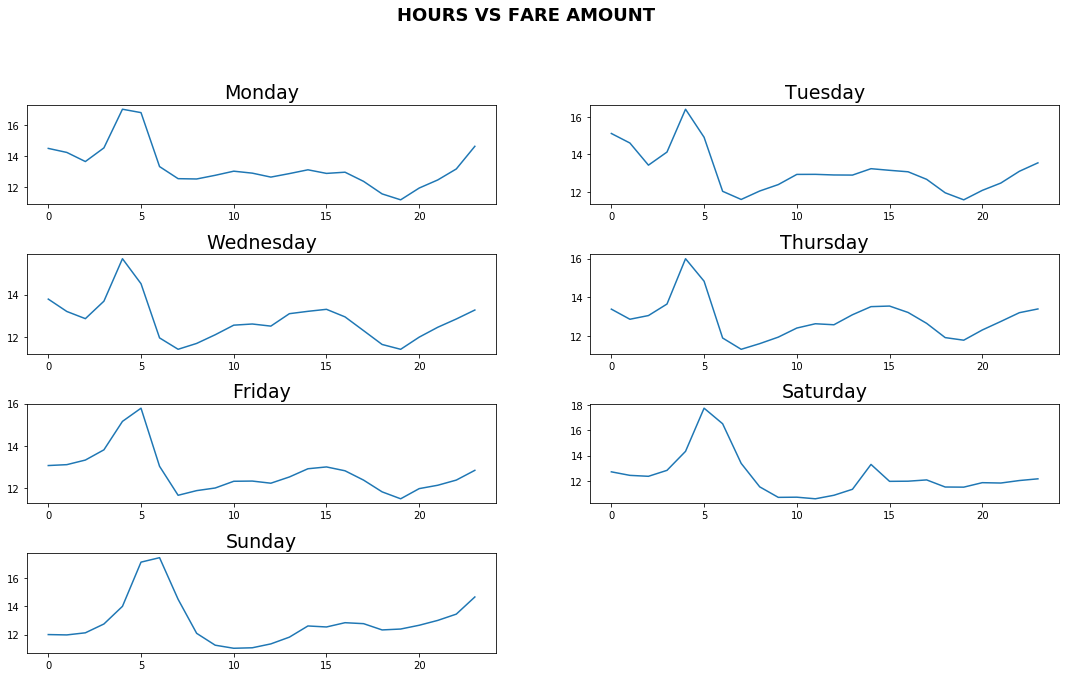

In [22]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS FARE AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    monday = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    monday_1 = mean_fare_hour.loc[i:i,:]['fare_amount'].tolist()
    axis1.plot(monday,monday_1)

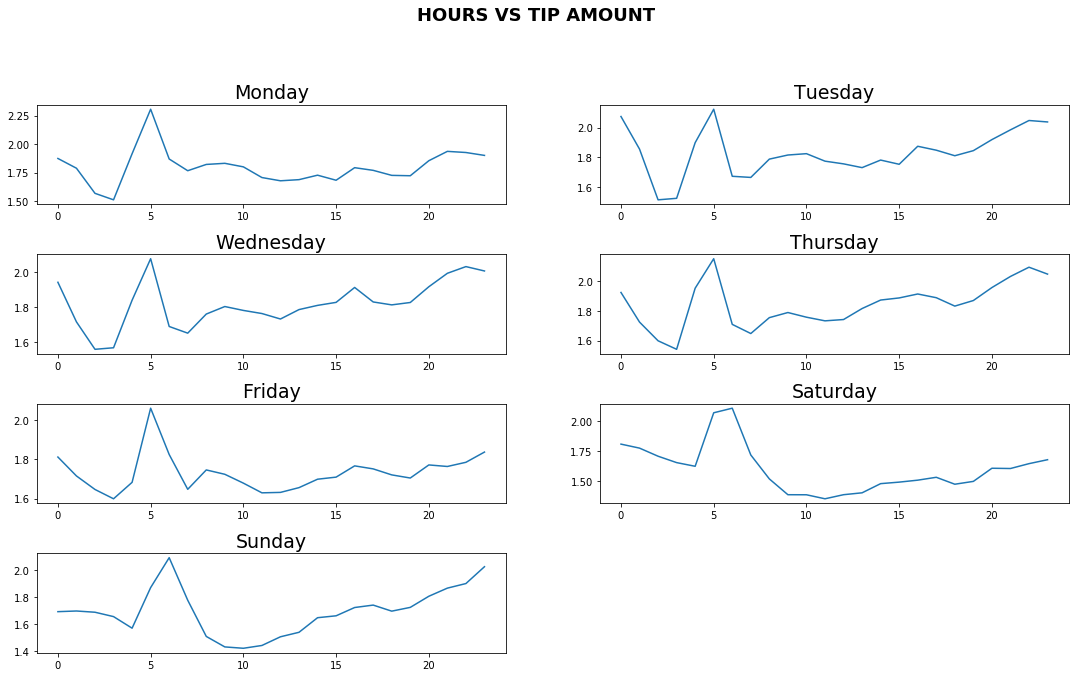

In [23]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TIP AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    y = mean_fare_hour.loc[i:i,:]['tip_amount'].tolist()
    axis1.plot(x,y)

In [24]:
group_dataframe3 = data_january.loc[:, ['weekday','hour','trip_distance']]
groups3 = group_dataframe3.groupby(['weekday','hour'])

In [25]:
trip_distances = groups3.mean()

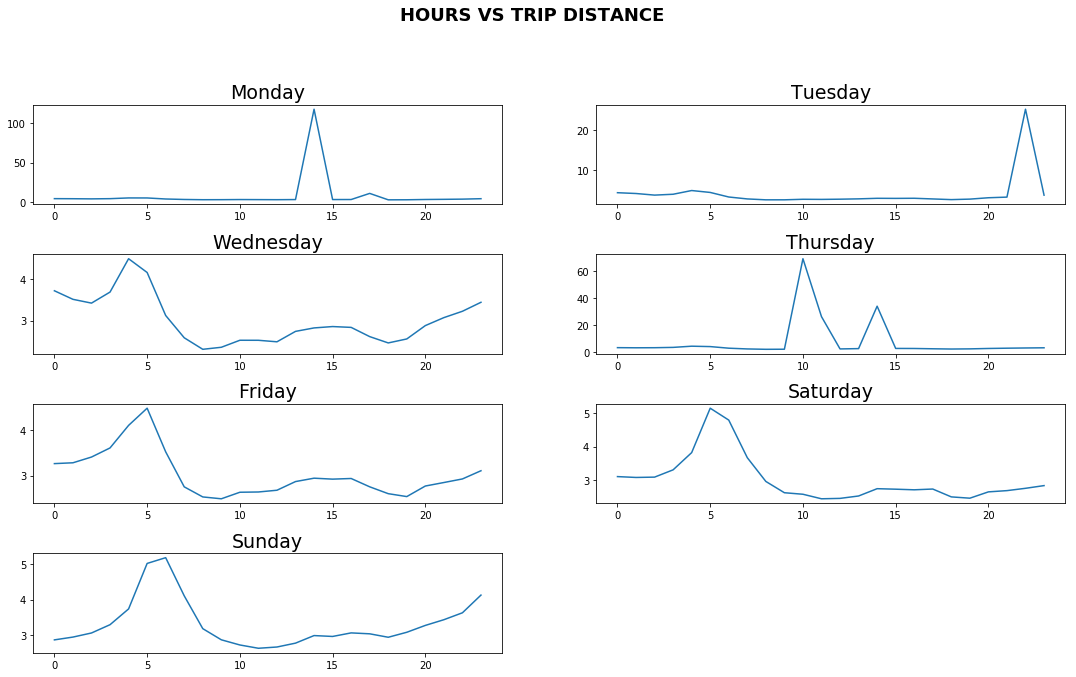

In [26]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TRIP DISTANCE', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = trip_distances.loc[i:i,:].index.get_level_values('hour').tolist()
    y = trip_distances.loc[i:i,:]['trip_distance'].tolist()
    axis1.plot(x,y)

In [27]:
trip_distances

trip_distance
weekday hour               
0       0          4.068117
        1          3.969708
        2          3.785345
        3          4.048509
        4          4.969352
        5          4.938782
        6          3.626540
        7          3.023455
        8          2.714610
        9          2.766242
        10         2.925433
        11         2.833121
        12         2.746360
        13         2.901405
        14       117.751322
        15         2.915546
        16         2.957519
        17        10.736670
        18         2.570272
        19         2.633144
        20         2.999125
        21         3.199003
        22         3.445772
        23         4.004755
1       0          4.224320
        1          4.021222
        2          3.617720
        3          3.833627
        4          4.771054
        5          4.290595
...                     ...
5       18         2.486402
        19         2.447281
        20         2.637473
        21         2.675118
        22         2.744946
        23         2.826385
6       0          2.870611
        1          2.949145
        2          3.064050
        3          3.296643
        4          3.738433
        5          5.013988
        6          5.175396
        7          4.105488
        8          3.185393
        9          2.872802
        10         2.727746
        11         2.635366
        12         2.670711
        13         2.779184
        14         2.991390
        15         2.966723
        16         3.066355
        17         3.040687
        18         2.944215
        19         3.084000
        20         3.276270
        21         3.436058
        22         3.630299
        23         4.126598

[168 rows x 1 columns]

In [29]:
data_january.loc[data_january['weekday']==0,'trip_distance']

960746     13.00
960747      5.10
960748      5.30
960749      0.40
960750      1.03
960751      2.21
960752      2.40
960753      8.65
960754      7.50
960755      1.30
960756      3.20
960757     11.80
960758      7.24
960759      1.00
960760      6.33
960761      7.53
960762     20.80
960763      0.72
960764      0.76
960765      2.96
960766      9.78
960767      0.75
960768      1.88
960769      8.70
960770     10.71
960771      1.27
960772     21.03
960773      0.50
960774      1.10
960775      2.69
           ...  
8625754     0.80
8625755     1.00
8625756     1.21
8625757     0.33
8625758     1.76
8625759     2.20
8625760     6.50
8625761    11.28
8625762     0.10
8625763     1.90
8625764    10.20
8625765     1.05
8625766     1.29
8625767     1.79
8625768    10.80
8625769     1.71
8625770     8.50
8625771    18.40
8625772     1.52
8625773     2.10
8625774     6.41
8625775     0.70
8625776     0.87
8625777     5.16
8625778     6.10
8625779     1.76
8625780     2.38
8625781    13.